## 앙상블 학습

## 앙상블 학습 (Ensemble Learning) 개요

### 앙상블 학습을 통한 분류   

- 여러 개의 분류기(Classifier)을 사용해서 예측 결합함으로써 보다 정확한 최종 예측을 도출하는 기법
- 단일 분류기 사용 때보다 신뢰성이 높은 예측값을 얻을 수 있음
- 쉽고 편하면서도 강력한 성능 보유
- 대부분의 정형 데이터 분류 시 뛰어난 성능을 나타냄
- 이미지, 영상, 음성 등의 비정형 데이터 분류 : 딥러닝 성능 뛰어남

### 대표적인 앙상블 알고리즘
- 랜덤포레스트
- 그레디언트 부스팅

#### 최신 앙상블 알고리즘
- XGBoost 
- LightBGM : XGBoot 예측성능 유사하면서 수행속도 훨씬 빠름
- Stacking : 메타모델 수립

### 앙상블 학습결과(예측) 결합하는 방법

- 보팅(Voting)
- 배깅(Bagging)
- 부스팅(Boosting)

보팅(Voting) : 여러 분류기가 투표를 통해 최종 예측 결과를 결정하는 방식
- 일반적으로 서로 다른 알고리즘을 가진 분류기를 결합

배깅(Bagging) : 보팅과 동일하게 여러 분류기가 투표를 통해 최종 예측 결과를 결정하는 방식
- 각각의 분류기가 모두 같은 유형의 알고리즘 기반이지만, 
- 샘플링을 서로 다르게 하면서 학습 수행
- 대표적인 배깅 방식 : 랜덤 포레스트 알고리즘

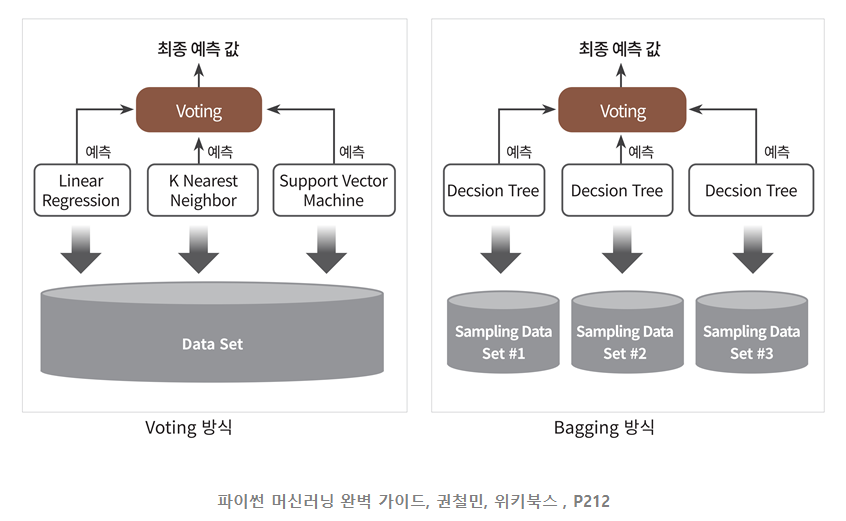

#### 배깅의 샘플링 방식 : 부트 스트래핑 분할 방식
- 개별 Classifier에게 데이터를 샘플링해서 추출하는 방식
- 각 샘플링된 데이터 내에는 중복 데이터 포함
- (교차 검증에서는 데이터 세트 간에 중복 허용하지 않음)

https://swalloow.github.io/bagging-boosting/

### 부스팅(Boosting)
- 여러 개의 분류기가 순차적으로 학습 수행하되
- 앞에서 학습한 분류기가 예측이 틀린 데이터에 대해서는 올바르게 예측할 수 있도록
- 다음 분류기에게는 가중치(weight)를 부여하면서 
- 학습과 예측을 진행하는 방식
- 예측 성능이 뛰어나 앙상블 학습 주도
- boost : 밀어 올림
    
**대표적인 부스팅 모듈**
- Gradient Boost
- XGBoost(eXtra Gradient Boost)
- LightGBM(Light Gradient Boost)

#### 보팅 유형
- 하드 보팅
- 소프트 보팅

#### 하드 보팅 (Hard Voting)
- 다수결 원칙과 유사
- 예측한 결과값들 중에서 
- 다수의 분류기가 결정한 예측값을
- 최종 보팅 결과값으로 선정

#### 소프트 보팅 (Soft Voting)
- 분류기들의 레이블 값 결정 확률을 평균내서
- 확률이 가장 높은 레이블 값을
- 최종 보팅 결과값으로 선정
- 일반적으로 소프트 보팅이 예측 성능이 좋아서 더 많이 사용

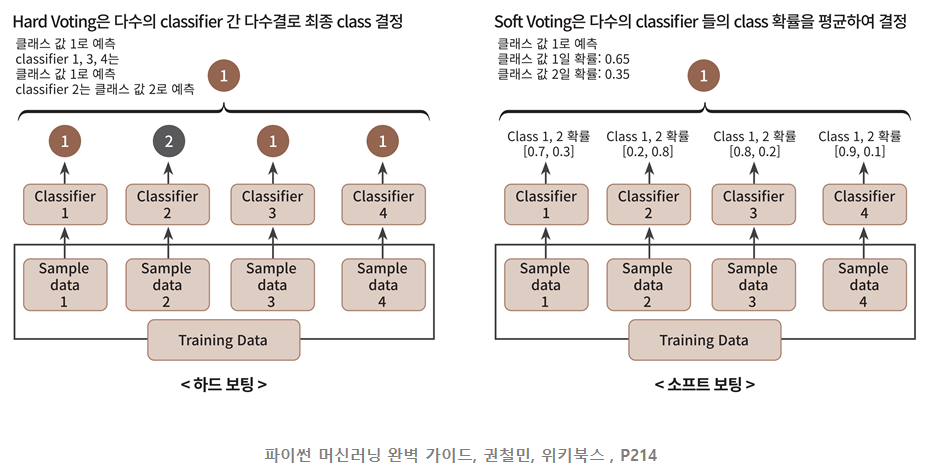

### Voting Classifier

### 보팅 방식의 앙상블 예제 : 위스콘신 유방암 데이터 세트 예측 분석  

**위스콘신 유방암 데이터 세트**  

- 유방암의 악성종양, 양성종양 여부를 결정하는 이진 분류 데이터 세트
- 종양의 크기, 모양 등의 형태와 관련한 많은 피처 포함
- 사이킷런의 보팅 양식의 앙상블을 구현한 VotingClassifier 클래스를 이용해서 보팅 분류기 생성  
- load_breast_cancer() 함수를 통해 위스콘신 유방암 데이터 세트 생성
- 로지스틱 회귀와 KNN 기반으로 소프트 보팅 방식으로 보팅 분류기 생성


### 데이터 준비

In [1]:
import pandas as pd

from sklearn.ensemble import VotingClassifier # 보팅앙상블모델을 구성할 수 있는 모듈
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [2]:
cancer = load_breast_cancer()

data_df = pd.DataFrame(cancer.data, columns = cancer.feature_names)
data_df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


- 개별 모델 : 로지스틱 회귀/ KNN   

**학습/예측/평가 후 성능 비교**

로지스틱 회귀
- 선형 회귀 방식을 분류에 적용한 알고리즘
- 선형 회귀 방식을 기반으로 하되
- 시그모이드 함수를 이용해 분류 수행

K- 최근접 이웃 알고리즘 (K-Nearest Neighbor) 
- 가장 직관적이고 간단
- 주변의 더 많은 데이터 범주로 분류하는 방식

In [3]:
data_df.shape

(569, 30)

In [4]:
# 1. 개별 모델 객체 인스턴스 생성  
lr_clf = LogisticRegression(solver='liblinear')
# LogisticRegression모듈의 solver 기본값이 liblinear 였음 - 지금은 기본값이 변경됨
# liblinear : 규제를 지원, 양이 적은 데이터에 적합함
knn_clf = KNeighborsClassifier(n_neighbors=8)

VotingClassifier 클래스의 주요 생성 인자
- estimators : 리스트 값으로 보팅에 사용될 여러 개(list형식)의 Classifier 객체들을 튜플 형식으로 입력 받음
    - [('LR',lr_clf),('KNN',knn_clf)]
- voting : 보팅 방식 - hard/soft (디폴트 : hard) 

In [5]:
# 2. 개별 모델을 소프트 보팅 기반의 앙상블 모델로 구현한 분류기 인스턴스 생성
vo_clf = VotingClassifier(estimators=[('LR',lr_clf),('KNN',knn_clf)],voting='soft')

In [6]:
# 3. 학습 (데이터세트 분리) 
# 데이터 세트 분리
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, 
                                                        test_size=0.2 , random_state= 156)

In [7]:
# 4. 모델학습
vo_clf.fit(X_train, y_train)

VotingClassifier(estimators=[('LR', LogisticRegression(solver='liblinear')),
                             ('KNN', KNeighborsClassifier(n_neighbors=8))],
                 voting='soft')

In [8]:
# 5. 예측
pred = vo_clf.predict(X_test)

In [9]:
# 평가
print('Voting 분류기 정확도: {0:.4f}'.format(accuracy_score(y_test , pred)))

Voting 분류기 정확도: 0.9561


In [10]:
# 로지스틱 회귀와 KNN 각 개별 모델로 학습/예측/평가
classifiers = [lr_clf, knn_clf]
for cls in classifiers :
    cls.fit(X_train, y_train)
    pred = cls.predict(X_test)
    print('정확도 : ', accuracy_score(y_test , pred))

정확도 :  0.9473684210526315
정확도 :  0.9385964912280702


C:\Users\82102\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


#### 결론 : 보팅을 통해서 개별 모델들을 합치면 좋아질 수 있는 가능성이 있고, 모델 방향을 선택할 수 있음

## 배깅(Bagging) 학습 유형

- 대표적인 알고리즘 : 랜덤포레스트 알고리즘  

    - 기반(개별)모델로 결정트리 모델을 사용함
        - 결정트리 : 쉽고 직관적인 분류 기준을 갖고있음
            - 단점 : 데이터를 과학게 학습 - 과적합
    - 결정트리 수십개~ 수천개의 많은 분류기를 결합해 다양한 상황을 학습하게 해서 과적합의 단점을 극복하고 있음

### Random Forest  

- 앙상블 알고리즘 중 수행속도가 빠르다
- 다양한 영역에서 높은 예측성능을 보인다
- 기반 알고리즘 : 결정트리

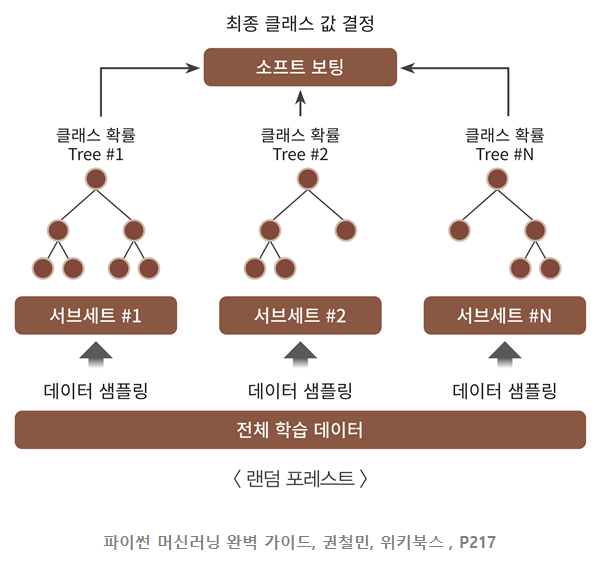

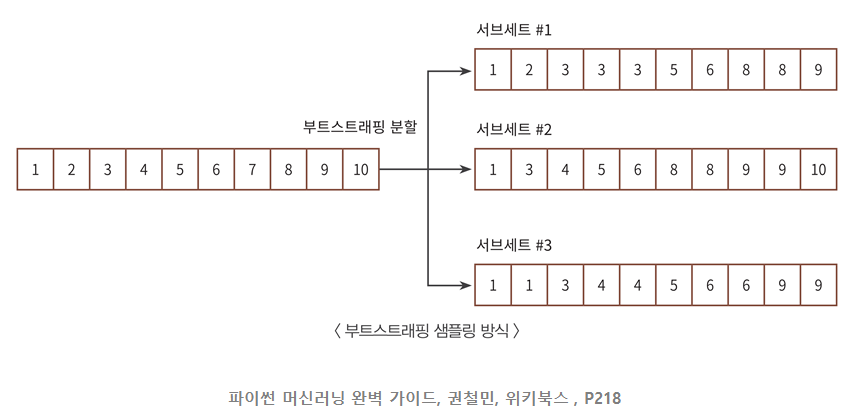

## 랜덤 포레스트 예제
- 앞의 사용자 행동 인식 데이터 세트를 
- 사이킷런의 RandomForestClassifier 클래스를 이용해 예측 수행

**결정 트리에서 사용한 사용자 행동 인지 데이터 세트 로딩**

In [11]:
X_train = pd.read_csv('./data/human_X_train.csv')
X_test = pd.read_csv('./data/human_X_test.csv')
y_train = pd.read_csv('./data/y_train.txt',sep='\s+',header=None,names=['action'])
y_test = pd.read_csv('./data/y_test.txt',sep='\s+',header=None,names=['action'])

In [12]:
X_train.head(5)

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-meanFreq(),fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)"
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.074323,-0.298676,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,0.158075,-0.595051,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,0.414503,-0.390748,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,0.404573,-0.117290,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,0.087753,-0.351471,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892


In [13]:
X_train.shape

(7352, 561)

In [14]:
y_train['action'].unique()

array([5, 4, 6, 1, 3, 2], dtype=int64)

#### 랜덤포레스트 이용 학습/예측/평가

In [15]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [16]:
rf_clf = RandomForestClassifier(random_state=0,n_estimators=100)
rf_clf.fit(X_train, y_train)
pred = rf_clf.predict(X_test)
accuracy = accuracy_score(y_test, pred)
print('랜덤 포레스트 정확도: {0:.4f}'.format(accuracy))

랜덤 포레스트 정확도: 0.9253


#### 결과 : 정확도는 향상 되었지만 수행속도가 좋은편이 아님

**GridSearchCV 로 교차검증 및 하이퍼 파라미터 튜닝**
- 앞의 사용자 행동 데이터 세트 그대로 사용
- 튜닝 시간을 절약하기 위해 
    - n_estimators=100
    - cv=2

n_estimators : 결정 트리의 개수. 디폴트 10
- 많이 설정할수록 좋은 성능을 기대할 수 있지만
- 계속 증가시킨다고 무조건 향샹되는 것은 아님
- 또 증가시킬수록 학습 수행 시간이 오래 걸림
    - 멀티코어환경에서는 n_jobs = -1로 설정하면 꽤 속도가 빨라짐

- 기반 모델이 의사결정 트리임
    - 하이퍼파라미터는 구성을 위한 파라미터 제외하고 트리와 동일
    - 트리기반 알고리즘은 하이퍼파라미터가 많음(단점)
        - 배깅, 부스팅 구성을 위한 하이퍼 파라미터가 추가됨
        - 튜닝시 시간이 오래걸림

In [17]:
from sklearn.model_selection import GridSearchCV

# 테스트해볼 데이터를 많이 넣으면 기하급수적으로 늘어난다
params = {
    'n_estimators':[100], # 1차적으로 100개를 사용 나머지 하이퍼파라미터에 대해서 튜닝
    'max_depth' : [6,8,10,12],
    'min_samples_leaf' : [8,12, 18],
    'min_samples_split' : [8,16, 20]
}
rf_clf = RandomForestClassifier(random_state=0,n_jobs=-1)

grid_cv = GridSearchCV(rf_clf, param_grid=params, cv=2, n_jobs= -1)
grid_cv.fit(X_train,y_train)
print('최적 하이퍼 파라미터:\n', grid_cv.best_params_)
print('최고 예측 정확도: {0:.4f}'.format(grid_cv.best_score_))

최적 하이퍼 파라미터:
 {'max_depth': 10, 'min_samples_leaf': 8, 'min_samples_split': 8, 'n_estimators': 100}
최고 예측 정확도: 0.9180


#### 튜닝된 하이퍼파라미터로 재 학습/예측/평가 - 분류기 수를 확장

In [18]:
rf_clf1 = RandomForestClassifier(random_state=0,n_jobs=-1,
                                max_depth=10, min_samples_leaf=8,
                                min_samples_split=8, n_estimators=1000)
rf_clf1.fit(X_train,y_train)

RandomForestClassifier(max_depth=10, min_samples_leaf=8, min_samples_split=8,
                       n_estimators=1000, n_jobs=-1, random_state=0)

In [19]:
pred = rf_clf1.predict(X_test)
print('예측 정확도: {0:.4f}'.format(accuracy_score(y_test , pred)))

예측 정확도: 0.9196


### 개별 feature들의 중요도 시각화

- feature_importance_ 속성을 이용해서 피처중요를 알 수 있음

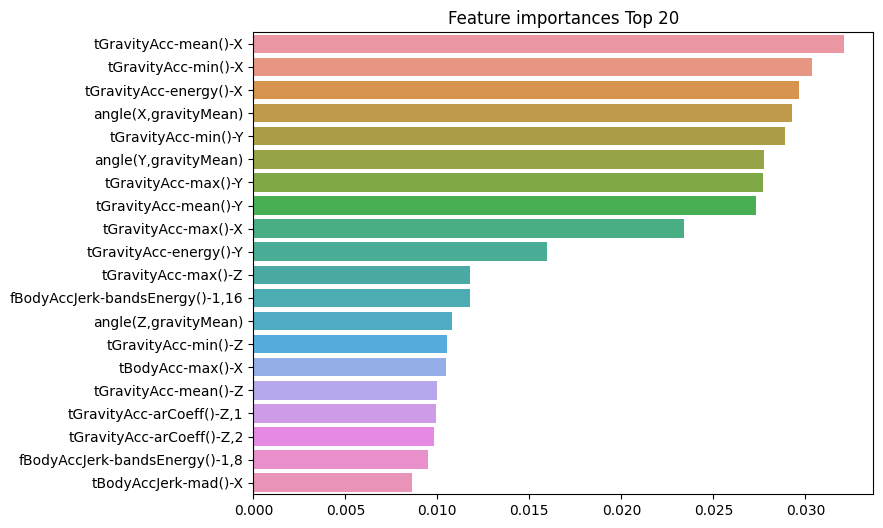

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
ftr_import = rf_clf1.feature_importances_
ftr_import_se = pd.Series(ftr_import, index=X_train.columns)
ftr_import_20 = ftr_import_se.sort_values(ascending=False)[:20]
# 중요도가 높은 20개의 피처
plt.figure(figsize=(8,6))
plt.title('Feature importances Top 20')
sns.barplot(x=ftr_import_20, y=ftr_import_20.index) # 가로막대 그래프
plt.show()


# GBM(Gradient Boosting Machine)

부스팅(Boosting) 

- 여러 개의 약한 학습기(weak learner)를 순차적으로 학습-예측하면서
- 잘못 예측된 데이터에 가중치(weight) 부여를 통해
- 오류를 개선해 나가면서 학습하는 방식

대표적인 부스팅 알고리즘 
- GBM
- AdaBoost

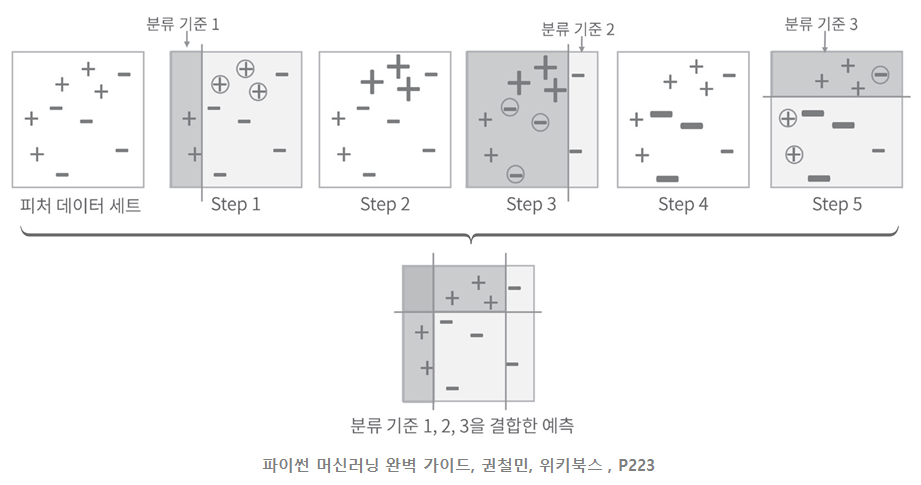

## GBM(Gradient Boosting Machine) : 그래디언트 부스트
- 에이다 부스트와 유사하지만
- 가중치 업데이터를 경사 하강법을 이용하는 것이 큰 차이
    - 반복 수행을 통해 오류를 최소화할 수 있도록
    - 가중치의 업데이트 값을 도출
    - 오류값 = 실제값 - 예측값
- 분류와 회귀 둘 다 가능

경사 하강법(Gradient Descent)
- 함수의 기울기(경사)를 구하고 경사의 절대값이 낮은 쪽으로 계속 이동시켜 극값에 이를 때까지 반복시키는 것(위키백과)
- 제시된 함수의 기울기로 최소값을 찾아내는 머신러닝 알고리즘
- 매개변수를 반복적으로 조정해서 최소 함수값을 갖게하는 독립변수를 찾는 방법

In [21]:
from sklearn.ensemble import GradientBoostingClassifier
import time
import warnings
warnings.filterwarnings('ignore')

XX_train = pd.read_csv('./data/human_X_train.csv')
X_test = pd.read_csv('./data/human_X_test.csv')
y_train = pd.read_csv('./data/y_train.txt',sep='\s+',header=None,names=['action'])
y_test = pd.read_csv('./data/y_test.txt',sep='\s+',header=None,names=['action'])

In [22]:
# GBM 수행 시간을 측정하기 위한 time()객체 생성
start_time = time.time()

In [23]:
start_time = time.time()
gb_clf = GradientBoostingClassifier(random_state=0)
gb_clf.fit(X_train, y_train)
gb_pred=gb_clf.predict(X_test)
gb_accuracy = accuracy_score(y_test, gb_pred)

print('GBM 정확도: {0:.4f}'.format(gb_accuracy))
print("GBM 수행 시간: {0:.1f} 초 ".format(time.time() - start_time))

GBM 정확도: 0.9389
GBM 수행 시간: 599.6 초 


In [24]:
len(y_test),len(pred)

(2947, 2947)

####  결과 :

- 랜덤포레스트보다 GBM이 예측 성능이 조금 더 뛰어난 경우가 많음
- 단점 : 수행시간이 오래 걸림, 하이퍼파라미터가 랜덤포레스트보다 많고 튜닝 노력도 더 필요
       : 병렬지원을 하지 않기 때문에 대용량 데이터인 경우 학습시간이 많이 상승하게됨

## GBM 하이퍼 파라미터 및 튜닝

### GBM의 주요 하이퍼 파라미터  

**`loss`** : 경사 하강법에서 사용할 비용 함수 지정. 기본값은 'deviance'
    
**`n_estimators`** : weak learner의 개수. 기본값 100
- weak learner가 순차적으로 오류를 보정하므로
- 개수가 많을수록 예측 성능이 일정 수준까지 좋아질 수 있음
- 그러나 개수가 많을 수록 시간이 오래 걸림

**`learning_rate`** : GBM이 학습을 진행할 때마다 적용하는 학습률
- weak learner가 순차적으로 오류값을 보정해 나가는 데 적용하는 계수
- 0 ~ 1 사이의 값 지정 (기본값 0.1)
- 작은 값을 적용하면 업데이트 되는 값이 작아져서
    - 최소 오류 값을 찾아 예측 성능이 높아질 가능성은 높지만
    - 많은 weak learner의 순차적인 반복 작업에 수행 시간이 오래 걸림
- 너무 작게 설정하면 모든 weak learner의 반복이 완료되어도
    - 최소 오류값을 찾지 못할 수도 있음
- 반대로 큰 값을 적용하면 최소 오류값을 찾지 못하고 그냥 지나져 버려
    - 예측 성능이 떨어질 가능성이 높아지지만 빠른 수행은 가능

**`subsample`** : weak learner가 학습에 사용하는 데이터의 샘플링 비율
- 기본값 1 : 전체 학습 데이터를 기반으로 학습한다는 의미
- 0.5 : 학습 데이터의 50%
- 과적합이 염려되는 경우 1보다 작은 값으로 설정

In [25]:
# GridSearchCV 이용해서 하이퍼 파라미터 최적화
# 사용자 행동 데이터 세트 정도의 데이터 양에
# 많은 하이퍼 파라미터로 튜닝하게 되면 시간이 상당히 오래 걸림
# 간략하게 n_estimators와 learning_rate만 적용

from sklearn.model_selection import GridSearchCV
params ={
    'n_estimators':[100,500],
    'learning_rate' : [0.05, 0.1]
}
grid_cv = GridSearchCV(gb_clf, param_grid=params, cv=2, verbose=1)
grid_cv.fit(X_train, y_train)
print('최적 하이퍼 파라미터:\n', grid_cv.best_params_)
print('최고 예측 정확도: {0:.4f}'.format(grid_cv.best_score_))


Fitting 2 folds for each of 4 candidates, totalling 8 fits


KeyboardInterrupt: 

- 최적 하이퍼 파라미터:
-  {'learning_rate': 0.1, 'n_estimators': 500}
- 최고 예측 정확도: 0.9011

In [27]:
# GridSearchCV를 이용하여 최적으로 학습된 estimator로 
# 테스트 데이터 세트에 적용해서 예측 수행. 
gb_pred = grid_cv.best_estimator_.predict(X_test)
gb_accuracy = accuracy_score(y_test, gb_pred)
print('GBM 정확도: {0:.4f}'.format(gb_accuracy))

# 결과
# 테스트 데이터 세트에서 약 96.06 % 정확도 도출

AttributeError: 'GridSearchCV' object has no attribute 'best_estimator_'

### 결론  
- GBM은 수행시간이 오래 걸린다는 단점이 있지만 과적합에도 강해서 예측성능이 뛰어난 알고리즘
- 많은 알고리즘이 GBM을 기반으로 새롭게 만들어지고 있음 
    - 머신러닝 세계에서 가장 각광을 받는 boosting 알고리즘 2개가 GBM 에 기반함
        - XGBoost
        - LightGBM